In [1]:
from QuantLib import *

In [2]:
# Set up global evaluation date.
today = Date(24, October, 2024)
Settings.instance().evaluationDate = today

In [3]:
# Building the option requires only the specification of its contract. Market data will be selected and passed later, depending on the calculation methods.
option = EuropeanOption(PlainVanillaPayoff(Option.Call, 100.0), EuropeanExercise(Date(24, December, 2024)))

1st pricing method: BS

In [4]:
# Quoted market data. Assume flat risk-free rate and volatility.
u = SimpleQuote(100.0)
r = SimpleQuote(0.05)
sigma = SimpleQuote(0.20)

In [5]:
# The market data are encapsulated in a process object.
riskFreeCurve = FlatForward(0, TARGET(), QuoteHandle(r), Actual360())
volatility = BlackConstantVol(0, TARGET(), QuoteHandle(sigma), Actual360())

In [6]:
process = BlackScholesProcess(QuoteHandle(u), YieldTermStructureHandle(riskFreeCurve), BlackVolTermStructureHandle(volatility))

In [7]:
engine = AnalyticEuropeanEngine(process)

In [8]:
option.setPricingEngine(engine)

In [9]:
option.NPV()

3.7087144250373063

In [10]:
print(option.delta())
print(option.gamma())
print(option.vega())
print(option.theta())
print(option.rho())

0.5572784711209668
0.0479577820682043
16.252359478669227
-12.19251304799381
8.814353038640615


Market changes

In [11]:
# The option is notified when any of the data changes.
print(option.NPV())

3.7087144250373063


In [12]:
u.setValue(105.0)
print(option.NPV())

7.052385273539633


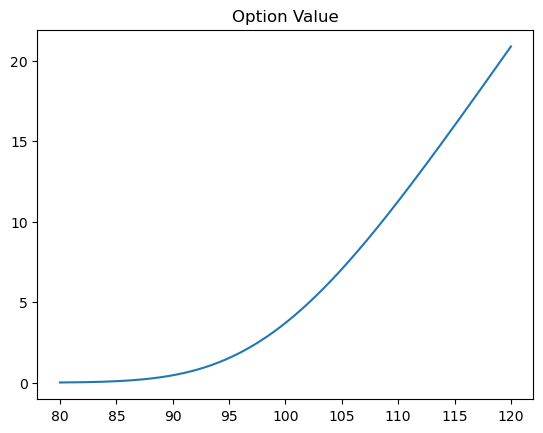

In [13]:
import matplotlib.pyplot as plt
import numpy as np

f, ax = plt.subplots()
xs = np.linspace(80, 120, 400)
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
ax.set_title("Option Value")
_ = ax.plot(xs, ys)

Date changes
The value also changes if we advance the evaluation date.

In [14]:
u.setValue(105.0)
print(option.NPV())

7.052385273539633


In [15]:
Settings.instance().evaluationDate = Date(25, November, 2024)

In [16]:
print(option.NPV()) 

5.9529784757748985


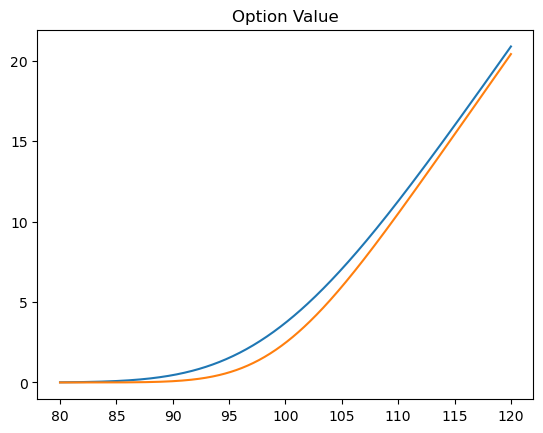

In [17]:
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
ax.plot(xs, ys)
display(f)

In [18]:
# 1 day before maturity. close to intrinsic value.
Settings.instance().evaluationDate = Date(23, December, 2024)

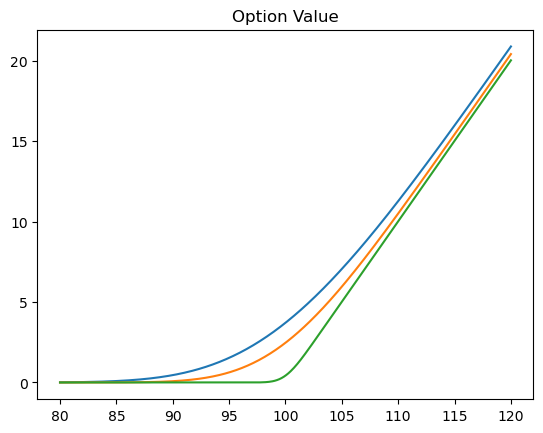

In [19]:
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
ax.plot(xs, ys)
display(f)

In [20]:
# other market data also affect the value, of course.
Settings.instance().evaluationDate = today
u.setValue(100.0)
r.setValue(0.06)
sigma.setValue(0.30)
print(option.NPV())

5.42087242410013


In [21]:
r.setValue(0.04)
print(option.NPV())

5.25193877179657


In [22]:
sigma.setValue(0.15)
print(option.NPV())

2.807088863442664


Other pricing methods

In [23]:
Settings.instance().evaluationDate = today
u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)

In [24]:
print(option.NPV())

6.560073820974377


In [25]:
model = HestonModel(
    HestonProcess(
        YieldTermStructureHandle(riskFreeCurve),
        YieldTermStructureHandle(FlatForward(0, TARGET(), 0.0, Actual360())),
        QuoteHandle(u),
        0.04, 0.1, 0.01, 0.05, -0.75
    )
)

In [26]:
engine = AnalyticHestonEngine(model)
option.setPricingEngine(engine)

In [27]:
print(option.NPV())

6.5808163829973365


Lazy recalculation

In [28]:
engine = MCEuropeanEngine(process, "PseudoRandom", timeSteps=20, requiredSamples=250000)
option.setPricingEngine(engine)

In [29]:
import time
time1 = time.time()
print(option.NPV())
time2 = time.time()
print(time2 - time1)

6.564362168649418
0.7462823390960693


In [30]:
# we did not calculate again, the result is stored.
time1 = time.time()
print(option.NPV())
time2 = time.time()
print(time2 - time1)

6.564362168649418
0.0


In [31]:
# after the input change, the option is recalculated.
u.setValue(104.0)
time1 = time.time()
print(option.NPV())
time2 = time.time()
print(time2 - time1)

5.857013463381654
0.761228084564209


In [32]:
# not recalculated again.
time1 = time.time()
print(option.NPV())
time2 = time.time()

5.857013463381654
